# Logistic Regression [Customer Churn Data]

#### Load Libraries

In [47]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
# Import data into a pandas dataframe
data = pd.read_csv('Telco-Customer-Churn.csv')

# Changing 'charges_total' to numeric and 'senior_citizen' to object type.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

# Filling missing values with 0 in 'charges_total'
data['TotalCharges'] = data['TotalCharges'].fillna(0)
data['TotalCharges'].isna().sum()

# Dropping customerID
data = data.drop('customerID', axis = 1)

# Looking for unique values of each column
for col in data.columns:
    print(f"There are {data[col].nunique()} unique values of {col}:", data[col].unique())

print(data.info())

There are 2 unique values of gender: ['Female' 'Male']
There are 2 unique values of SeniorCitizen: [0 1]
There are 2 unique values of Partner: ['Yes' 'No']
There are 2 unique values of Dependents: ['No' 'Yes']
There are 73 unique values of tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
There are 2 unique values of PhoneService: ['No' 'Yes']
There are 3 unique values of MultipleLines: ['No phone service' 'No' 'Yes']
There are 3 unique values of InternetService: ['DSL' 'Fiber optic' 'No']
There are 3 unique values of OnlineSecurity: ['No' 'Yes' 'No internet service']
There are 3 unique values of OnlineBackup: ['Yes' 'No' 'No internet service']
There are 3 unique values of DeviceProtection: ['No' 'Yes' 'No internet service']
There are 3 unique values of TechSupport: ['No' 'Yes' 'No internet service']
There 

In [3]:
data1 = data.copy()
# Converting categorical variables to dummy variables
cols1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
         'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
         'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cols1:
    dummies = pd.get_dummies(data1[col], prefix=col)
    data1 = pd.concat([data1, dummies], axis=1)
    data1.drop(col, axis=1, inplace=True)
    
data1['Churn'] = data1['Churn'].replace({'Yes':1,'No':0})
data1.info() # 47 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

In [4]:
data2 = data.copy()
# Converting binary categorical variables from `Yes` to 1s and `No` to 0s
cols2 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
cols3 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
         'Contract', 'PaymentMethod']

data2['gender'] = data2['gender'].replace({'Male':1,'Female':0})
data2['Churn'] = data2['Churn'].replace({'Yes':1, 'No':0})

for col in cols1:
    data2[col] = data2[col].replace({'Yes':1,'No':0}) 
    data2[col] = data2[col].astype('object')

for col in cols3:
    dummies = pd.get_dummies(data2[col], prefix=col)
    data2 = pd.concat([data2, dummies], axis=1)
    data2.drop(col, axis=1, inplace=True)
    
data2.info() # 41 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   object 
 2   Partner                                  7043 non-null   object 
 3   Dependents                               7043 non-null   object 
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   object 
 6   PaperlessBilling                         7043 non-null   object 
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_0                          7043 no

In [5]:
# Normalizing the numerical data
# Create a StandardScaler object
scaler = MinMaxScaler()

# Standardize the data
data1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)
data2 = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns)

data1.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.472222,0.385075,0.217564,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.012453,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.625000,0.239303,0.211951,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.027778,0.521891,0.017462,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis

You can leverage what done in one of the previous assignments, recreate it and expand it.

## Feature Engineering and Analysis
Think about any possible feature that is predictive of the target.  
Measure how each feature is predictive of the target and select all those relevant for the model.

## Configure the model using an appropriate classification technique

In [6]:
def predict(x, q):
    """
    Logistic function or Sigmoid function
    """
    Z = x.dot(q)
    return 1/(1 + np.exp(-Z))

def cost_function(x, q, y_true):
    y_pred = predict(x, q)
    """Computes the error between the predicted and true target values."""
    m = len(y_pred)
    return -1/m * np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

def gradient(x, q, y_true):
    m = x.shape[0]
    y_pred = predict(x, q)
    grad = 1/m * x.T.dot(y_pred - y_true)
    return grad

def log_reg_sgd(x, y_true, q, learning_rate, num_iterations):
    """
    Stochastic gradient descent for two class (0,1) logistic regression
    """
    err = []
    for i in range(num_iterations):
        # Randomly select a data point
        idx = np.random.randint(x.shape[0])
        xi = x[idx:idx+1]
        yi = y_true[idx:idx+1]
        
        # Calculate the gradient on the selected data point
        grad = gradient(xi, q, yi)
        
        # Update the parameters
        q = q - (learning_rate * grad)
        
        # Calculate cost and append to `err` list
        cost = cost_function(x, q, y_true)
        err.append(cost)
    return q, err

def log_reg_regularized_sgd(x, y_true, q, learning_rate, lamda, num_iterations):
    """
    Stochastic gradient descent for logistic regression of two classes (0,1) with regularization
    """
    err = []
    for i in range(num_iterations):
        # Randomly select a data point
        idx = np.random.randint(x.shape[0])
        xi = x[idx:idx+1]
        yi = y_true[idx:idx+1]
        
        # Calculate the gradient on the selected data point
        grad = gradient(xi, q, yi)
        
        # Update the parameters
        q = q - learning_rate * (grad - (lamda * q)/len(q))
        
        # Calculate cost and append to `err` list
        cost = cost_function(x, q, y_true)
        err.append(cost)
    return q, err

In [7]:
# Initializing hyperparameters
alpha = 0.1
num_iters = 10000
lamda = 4

## Model 1.1: Using all variables with categorical variables made us dummies (47 features) [LOG REG]

In [8]:
X1 = data1.copy()

# Dropping `churn` column
X1 = X1.drop('Churn', axis = 1)

# Inserting column of ones for XO parameter Q0
X1.insert(0, 'X0', 1)
target1 = data1['Churn']

# 80-20% split to training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, target1, test_size = 0.2, random_state = 13)

# Initlaizing parameters `q`s
params1 = np.zeros(X_train1.shape[1])

In [9]:
# Logistric Regression
parameters1_1, errors1_1 = log_reg_sgd(X_train1, y_train1, params1, alpha, num_iters) 

### Metric for assessment of the model

In [10]:
y_predicted1_1 = predict(X_test1, parameters1_1)

# Converting predicted probabilities to binary labels
y_pred1_1 = (y_predicted1_1 >= 0.5).astype(int)

# Create confusion matrix
tn1_1, fp1_1, fn1_1, tp1_1 = confusion_matrix(y_test1, y_pred1_1).ravel()

# Calculate evaluation metrics
accuracy1_1 = accuracy_score(y_test1, y_pred1_1)
precision1_1 = precision_score(y_test1, y_pred1_1)
recall1_1 = recall_score(y_test1, y_pred1_1)
f11_1 = f1_score(y_test1, y_pred1_1)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn1_1, '\tFalse Positive: ', fp1_1)
print('False Negative: ', fn1_1, '\tTrue Positive: ', tp1_1)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy1_1)
print('Precision: ', precision1_1)
print('Recall/Sensitivity: ', recall1_1)
print('F1 Score/Specificity: ', f11_1)

# Calculate AUC
auc1_1 = roc_auc_score(y_test1, y_predicted1_1)
print('AUC: ', auc1_1)

Confusion Matrix:
True Negative:  974 	False Positive:  74
False Negative:  218 	True Positive:  143

Evaluation Metrics: 
Accuracy:  0.7927608232789212
Precision:  0.6589861751152074
Recall/Sensitivity:  0.3961218836565097
F1 Score/Specificity:  0.4948096885813149
AUC:  0.8318284663043707


When 0.5 < AUC < 1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.

## Model 1.2: Using all variables with categorical variables made as dummies (47 features) [REG LOG REG]

In [11]:
# Regularized Logistic Regression
parameters1_2, errors1_2 = log_reg_regularized_sgd(X_train1, y_train1, params1, alpha, lamda, num_iters)

### Metric for assessment of the model

In [12]:
y_predicted1_2 = predict(X_test1, parameters1_2)

# Converting predicted probabilities to binary labels
y_pred1_2 = (y_predicted1_2 >= 0.5).astype(int)

# Create confusion matrix
tn1_2, fp1_2, fn1_2, tp1_2 = confusion_matrix(y_test1, y_pred1_2).ravel()

# Calculate evaluation metrics
accuracy1_2 = accuracy_score(y_test1, y_pred1_2)
precision1_2 = precision_score(y_test1, y_pred1_2)
recall1_2 = recall_score(y_test1, y_pred1_2)
f11_2 = f1_score(y_test1, y_pred1_2)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn1_2, '\tFalse Positive: ', fp1_2)
print('False Negative: ', fn1_2, '\tTrue Positive: ', tp1_2)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy1_2)
print('Precision: ', precision1_2)
print('Recall/Sensitivity: ', recall1_2)
print('F1 Score/Specificity: ', f11_2)

# Calculate AUC
auc1_2 = roc_auc_score(y_test1, y_predicted1_2)
print('AUC: ', auc1_2)

Confusion Matrix:
True Negative:  895 	False Positive:  153
False Negative:  151 	True Positive:  210

Evaluation Metrics: 
Accuracy:  0.7842441447835344
Precision:  0.5785123966942148
Recall/Sensitivity:  0.5817174515235457
F1 Score/Specificity:  0.580110497237569
AUC:  0.717862542555666


## Model 1.3: Using all variables with categorical variables made as dummies but inbuilt LogReg function (41 features)

In [55]:
# Instantiating logistic regression model
logreg1_3 = LogisticRegression()

# Fitting the model
logreg1_3.fit(X_train1, y_train1)

# Predicted probabilities
y_pred1_3 = logreg1_3.predict(X_test1)

# Create confusion matrix
tn1_3, fp1_3, fn1_3, tp1_3 = confusion_matrix(y_test1, y_pred1_3).ravel()

# Calculate evaluation metrics
accuracy1_3 = accuracy_score(y_test1, y_pred1_3)
precision1_3 = precision_score(y_test1, y_pred1_3)
recall1_3 = recall_score(y_test1, y_pred1_3)
f11_3 = f1_score(y_test1, y_pred1_3)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn1_3, '\tFalse Positive: ', fp1_3)
print('False Negative: ', fn1_3, '\tTrue Positive: ', tp1_3)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy1_3)
print('Precision: ', precision1_3)
print('Recall/Sensitivity: ', recall1_3)
print('F1 Score/Specificity: ', f11_3)

# Calculate AUC
auc1_3 = roc_auc_score(y_test1, y_pred1_3)
print('AUC: ', auc1_3)

Confusion Matrix:
True Negative:  930 	False Positive:  118
False Negative:  154 	True Positive:  207

Evaluation Metrics: 
Accuracy:  0.8069552874378992
Precision:  0.6369230769230769
Recall/Sensitivity:  0.5734072022160664
F1 Score/Specificity:  0.6034985422740525
AUC:  0.7304058911843692


## Model 2.1: Using all variables with categorical variables made as dummies (41 features) [LOG REG]

In [13]:
X2 = data2.copy()

# Dropping `churn` column
X2 = X2.drop('Churn', axis = 1)

# Inserting column of ones for XO parameter Q0
X2.insert(0, 'X0', 1)
target2 = data2['Churn']

# 80-20% split to training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, target2, test_size = 0.2, random_state = 13)

# Initlaizing parameters `q`s
params2 = np.zeros(X_train2.shape[1])

In [14]:
# Logistic Regression
parameters2_1, errors2_1 = log_reg_sgd(X_train2, y_train2, params2, alpha, num_iters)

### Metric for assessment of the model

In [15]:
y_predicted2_1 = predict(X_test2, parameters2_1)

# Converting predicted probabilities to binary labels
y_pred2_1 = (y_predicted2_1 >= 0.5).astype(int)

# Create confusion matrix
tn2_1, fp2_1, fn2_1, tp2_1 = confusion_matrix(y_test2, y_pred2_1).ravel()

# Calculate evaluation metrics
accuracy2_1 = accuracy_score(y_test2, y_pred2_1)
precision2_1 = precision_score(y_test2, y_pred2_1)
recall2_1 = recall_score(y_test2, y_pred2_1)
f12_1 = f1_score(y_test2, y_pred2_1)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn2_1, '\tFalse Positive: ', fp2_1)
print('False Negative: ', fn2_1, '\tTrue Positive: ', tp2_1)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy2_1)
print('Precision: ', precision2_1)
print('Recall/Sensitivity: ', recall2_1)
print('F1 Score/Specificity: ', f12_1)

# Calculate AUC
auc2_1 = roc_auc_score(y_test2, y_predicted2_1)
print('AUC: ', auc2_1)

Confusion Matrix:
True Negative:  931 	False Positive:  117
False Negative:  176 	True Positive:  185

Evaluation Metrics: 
Accuracy:  0.7920511000709723
Precision:  0.6125827814569537
Recall/Sensitivity:  0.5124653739612188
F1 Score/Specificity:  0.5580693815987933
AUC:  0.8269543887843351


## Model 2.2: Using all variables with categorical variables made as dummies (41 features) [REG LOG REG]

In [16]:
# Logistic Regression
parameters2_2, errors2_2 = log_reg_regularized_sgd(X_train2, y_train2, params2, alpha, lamda, num_iters)

### Metric for the assessment of the model

In [17]:
y_predicted2_2 = predict(X_test2, parameters2_2)

# Converting predicted probabilities to binary labels
y_pred2_2 = (y_predicted2_2 >= 0.5).astype(int)

# Create confusion matrix
tn2_2, fp2_2, fn2_2, tp2_2 = confusion_matrix(y_test2, y_pred2_2).ravel()

# Calculate evaluation metrics
accuracy2_2 = accuracy_score(y_test2, y_pred2_2)
precision2_2 = precision_score(y_test2, y_pred2_2)
recall2_2 = recall_score(y_test2, y_pred2_2)
f12_2 = f1_score(y_test2, y_pred2_2)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn2_2, '\tFalse Positive: ', fp2_2)
print('False Negative: ', fn2_2, '\tTrue Positive: ', tp2_2)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy2_2)
print('Precision: ', precision2_2)
print('Recall/Sensitivity: ', recall2_2)
print('F1 Score/Specificity: ', f12_2)

# Calculate AUC
auc2_2 = roc_auc_score(y_test2, y_predicted2_2)
print('AUC: ', auc2_2)

Confusion Matrix:
True Negative:  892 	False Positive:  156
False Negative:  149 	True Positive:  212

Evaluation Metrics: 
Accuracy:  0.7835344215755855
Precision:  0.5760869565217391
Recall/Sensitivity:  0.5872576177285319
F1 Score/Specificity:  0.5816186556927299
AUC:  0.7192013279482355


## Model 2.3: Using all variables with categorical variables made as dummies but inbuilt LogReg function (41 features)

In [57]:
# Instantiating logistic regression model
logreg2_3 = LogisticRegression()

# Fitting the model
logreg2_3.fit(X_train2, y_train2)

# Predicted probabilities
y_pred2_3 = logreg2_3.predict(X_test2)

# Create confusion matrix
tn2_3, fp2_3, fn2_3, tp2_3 = confusion_matrix(y_test2, y_pred2_3).ravel()

# Calculate evaluation metrics
accuracy2_3 = accuracy_score(y_test2, y_pred2_3)
precision2_3 = precision_score(y_test2, y_pred2_3)
recall2_3 = recall_score(y_test2, y_pred2_3)
f12_3 = f1_score(y_test2, y_pred2_3)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn2_3, '\tFalse Positive: ', fp2_3)
print('False Negative: ', fn2_3, '\tTrue Positive: ', tp2_3)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy2_3)
print('Precision: ', precision2_3)
print('Recall/Sensitivity: ', recall2_3)
print('F1 Score/Specificity: ', f12_3)

# Calculate AUC
auc2_3 = roc_auc_score(y_test2, y_pred2_3)
print('AUC: ', auc2_3)

Confusion Matrix:
True Negative:  931 	False Positive:  117
False Negative:  154 	True Positive:  207

Evaluation Metrics: 
Accuracy:  0.8076650106458482
Precision:  0.6388888888888888
Recall/Sensitivity:  0.5734072022160664
F1 Score/Specificity:  0.6043795620437955
AUC:  0.7308829904210103


## Model 3: Using first 19 features positively correlated with `Churn` (19 features)

<AxesSubplot:>

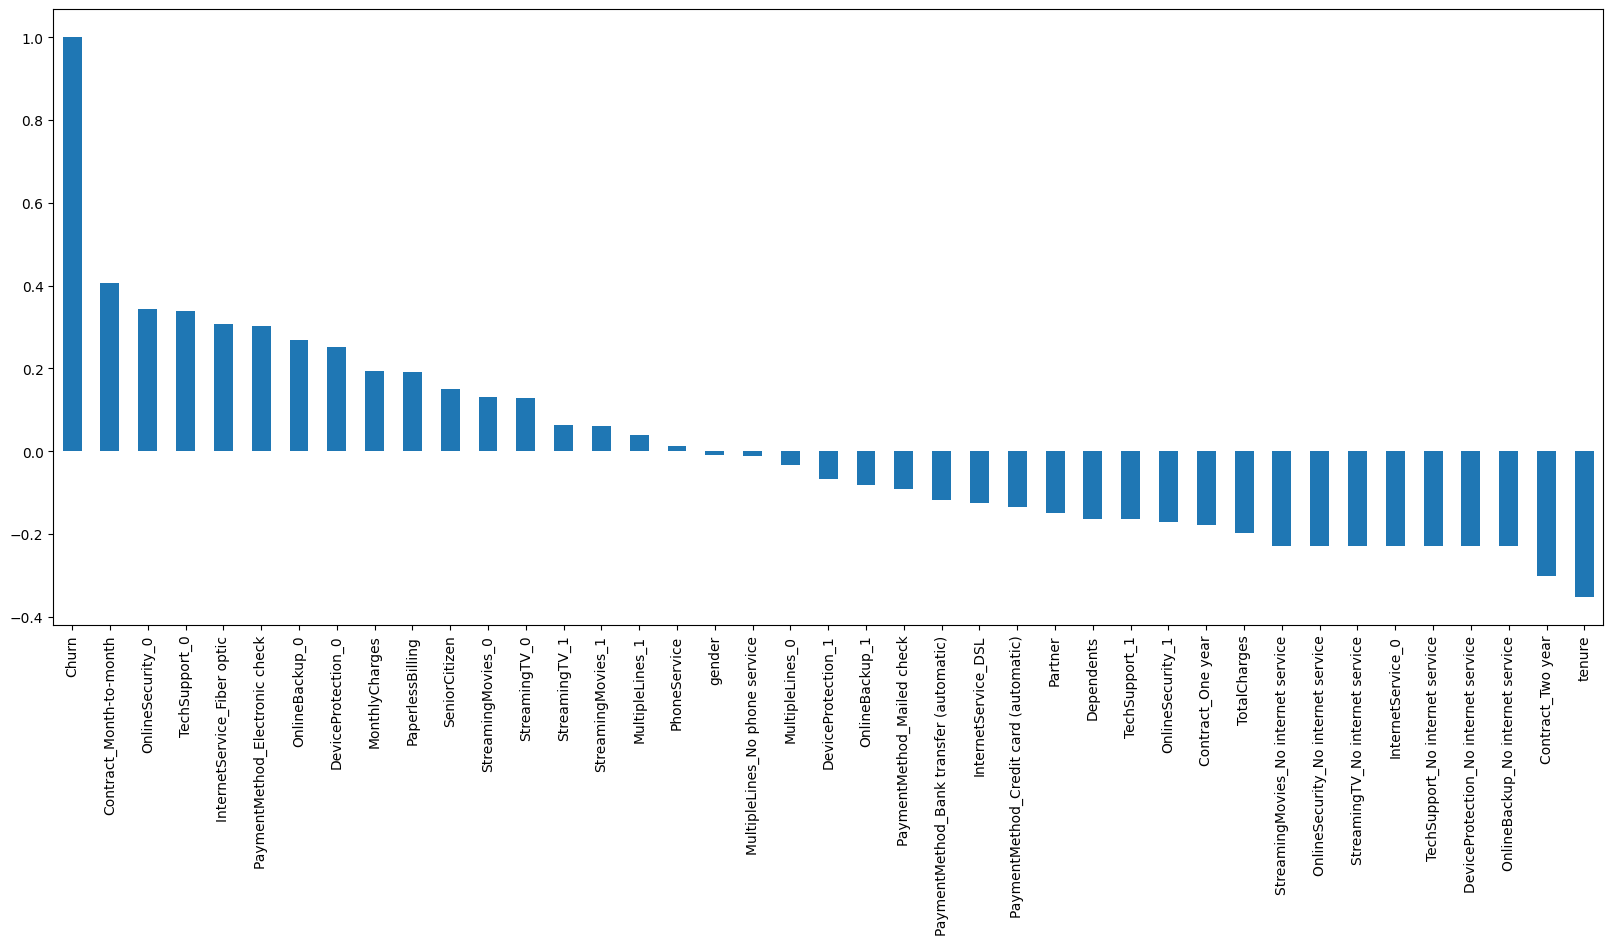

In [18]:
plt.figure(figsize=(20,8))
# Plotting all variable's correlations with churn in ascending order
data2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [19]:
# 19 features
X3 = data2.loc[:, ['Contract_Month-to-month', 'OnlineSecurity_0', 'TechSupport_0', 
                   'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
                  'OnlineBackup_0', 'DeviceProtection_0', 'MonthlyCharges', 'PaperlessBilling',
                  'SeniorCitizen', 'StreamingMovies_0', 'StreamingTV_0', 'StreamingTV_1', 
                   'StreamingMovies_1', 'MultipleLines_1', 'PhoneService']]

# Inserting column of ones for XO parameter Q0
X3.insert(0, 'X0', 1)
target3 = data2['Churn']

# 80-20% split to training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, target3, test_size = 0.2, random_state = 13)

params3 = np.zeros(X3.shape[1])

In [20]:
# Regularized Logistic Regression
parameters3, errors3 = log_reg_regularized_sgd(X_train3, y_train3, params3, alpha, lamda, num_iters)

### Metric for assessment of the model

In [21]:
y_predicted3 = predict(X_test3, parameters3)

# Converting predicted probabilities to binary labels
y_pred3 = (y_predicted3 >= 0.5).astype(int)

# Create confusion matrix
tn3, fp3, fn3, tp3 = confusion_matrix(y_test3, y_pred3).ravel()

# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test3, y_pred3)
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)
f13 = f1_score(y_test3, y_pred3)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn3, '\tFalse Positive: ', fp3)
print('False Negative: ', fn3, '\tTrue Positive: ', tp3)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy3)
print('Precision: ', precision3)
print('Recall/Sensitivity: ', recall3)
print('F1 Score/Specificity: ', f13)

# Calculate AUC
auc3 = roc_auc_score(y_test3, y_predicted3)
print('AUC: ', auc3)

Confusion Matrix:
True Negative:  879 	False Positive:  169
False Negative:  174 	True Positive:  187

Evaluation Metrics: 
Accuracy:  0.7565649396735273
Precision:  0.5252808988764045
Recall/Sensitivity:  0.518005540166205
F1 Score/Specificity:  0.5216178521617852
AUC:  0.6783729990907362


## Model 4: First n most influential variables with correlation > 0.2 (16 features)

In [22]:
corr_df = data2[data2.columns[0:]].corr()['Churn'][:]
np.abs(corr_df).sort_values(ascending=False)[1:20]

Contract_Month-to-month                 0.405103
tenure                                  0.352229
OnlineSecurity_0                        0.342637
TechSupport_0                           0.337281
InternetService_Fiber optic             0.308020
Contract_Two year                       0.302253
PaymentMethod_Electronic check          0.301919
OnlineBackup_0                          0.268005
DeviceProtection_0                      0.252481
DeviceProtection_No internet service    0.227890
OnlineBackup_No internet service        0.227890
OnlineSecurity_No internet service      0.227890
StreamingMovies_No internet service     0.227890
InternetService_0                       0.227890
TechSupport_No internet service         0.227890
StreamingTV_No internet service         0.227890
TotalCharges                            0.198324
MonthlyCharges                          0.193356
PaperlessBilling                        0.191825
Name: Churn, dtype: float64

In [23]:
# 16 features
X4 = data2.loc[:, ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_0', 'TechSupport_0', 
                   'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check',
                   'OnlineBackup_0', 'DeviceProtection_0', 'DeviceProtection_No internet service',
                   'OnlineBackup_No internet service','OnlineSecurity_No internet service', 
                   'StreamingMovies_No internet service','InternetService_0', 
                   'TechSupport_No internet service', 'StreamingTV_No internet service']]

# Inserting column of ones for XO parameter Q0
X4.insert(0, 'X0', 1)
target4 = data2['Churn']

# 80-20% split to training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, target4, test_size = 0.2, random_state = 13)

params4 = np.zeros(X4.shape[1])

In [24]:
# Regularized Logistic Regression
parameters4, errors4 = log_reg_regularized_sgd(X_train4, y_train4, params4, alpha, lamda, num_iters)

### Metric for assessment of the model

In [25]:
y_predicted4 = predict(X_test4, parameters4)

# Converting predicted probabilities to binary labels
y_pred4 = (y_predicted4 >= 0.5).astype(int)

# Create confusion matrix
tn4, fp4, fn4, tp4 = confusion_matrix(y_test4, y_pred4).ravel()

# Calculate evaluation metrics
accuracy4 = accuracy_score(y_test4, y_pred4)
precision4 = precision_score(y_test4, y_pred4)
recall4 = recall_score(y_test4, y_pred4)
f14 = f1_score(y_test4, y_pred4)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn4, '\tFalse Positive: ', fp4)
print('False Negative: ', fn4, '\tTrue Positive: ', tp4)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy4)
print('Precision: ', precision4)
print('Recall/Sensitivity: ', recall4)
print('F1 Score/Specificity: ', f14)

# Calculate AUC
auc4 = roc_auc_score(y_test4, y_predicted4)
print('AUC: ', auc4)

Confusion Matrix:
True Negative:  952 	False Positive:  96
False Negative:  179 	True Positive:  182

Evaluation Metrics: 
Accuracy:  0.8048261178140526
Precision:  0.6546762589928058
Recall/Sensitivity:  0.5041551246537396
F1 Score/Specificity:  0.5696400625978091
AUC:  0.7062760356093125


## Model 5: ServicesCount + Features (41 features)

In [26]:
services = ['PhoneService', 'MultipleLines_1', 'InternetService_DSL', 'InternetService_Fiber optic', 
            'OnlineSecurity_1', 'OnlineBackup_1', 'DeviceProtection_1', 'TechSupport_1', 
            'StreamingTV_1', 'StreamingMovies_1', 'PaperlessBilling']

X5 = data2.copy()
X5['ServicesCount'] = X5[services].apply(lambda x: x.sum(), axis=1)

# Dropping `churn` column
X5 = X5.drop('Churn', axis = 1)

# Inserting column of ones for XO parameter Q0
X5.insert(0, 'X0', 1)
target5 = data2['Churn']

# 80-20% split to training and test sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, target5, test_size = 0.2, random_state = 13)

params5 = np.zeros(X5.shape[1])

In [27]:
# Regularized Logistic Regression
parameters5, errors5 = log_reg_regularized_sgd(X_train5, y_train5, params5, alpha, lamda, num_iters)

### Metric for assessment of the model

In [28]:
y_predicted5 = predict(X_test5, parameters5)

# Converting predicted probabilities to binary labels
y_pred5 = (y_predicted5 >= 0.5).astype(int)

# Create confusion matrix
tn5, fp5, fn5, tp5 = confusion_matrix(y_test5, y_pred5).ravel()

# Calculate evaluation metrics
accuracy5 = accuracy_score(y_test5, y_pred5)
precision5 = precision_score(y_test5, y_pred5)
recall5 = recall_score(y_test5, y_pred5)
f15 = f1_score(y_test5, y_pred5)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn5, '\tFalse Positive: ', fp5)
print('False Negative: ', fn5, '\tTrue Positive: ', tp5)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy5)
print('Precision: ', precision5)
print('Recall/Sensitivity: ', recall5)
print('F1 Score/Specificity: ', f15)

# Calculate AUC
auc5 = roc_auc_score(y_test5, y_predicted5)
print('AUC: ', auc5)

Confusion Matrix:
True Negative:  891 	False Positive:  157
False Negative:  146 	True Positive:  215

Evaluation Metrics: 
Accuracy:  0.7849538679914834
Precision:  0.5779569892473119
Recall/Sensitivity:  0.5955678670360111
F1 Score/Specificity:  0.5866302864938608
AUC:  0.7228793533653337


## Model 6: - Services features + ServicesCount (17 features)

In [29]:
X6 = X5.loc[:, ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'ServicesCount']]

# Inserting column of ones for XO parameter Q0
X6.insert(0, 'X0', 1)
target6 = data2['Churn']

# 80-20% split to training and test sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, target6, test_size = 0.2, random_state = 13)

params6 = np.zeros(X6.shape[1])

In [30]:
# Regularized Logistic Regression
parameters6, errors6 = log_reg_regularized_sgd(X_train6, y_train6, params6, alpha, lamda, num_iters)

### Metric for the assessment of the model

In [31]:
y_predicted6 = predict(X_test6, parameters6)

# Converting predicted probabilities to binary labels
y_pred6 = (y_predicted6 >= 0.5).astype(int)

# Create confusion matrix
tn6, fp6, fn6, tp6 = confusion_matrix(y_test6, y_pred6).ravel()

# Calculate evaluation metrics
accuracy6 = accuracy_score(y_test6, y_pred6)
precision6 = precision_score(y_test6, y_pred6)
recall6 = recall_score(y_test6, y_pred6)
f16 = f1_score(y_test6, y_pred6)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn6, '\tFalse Positive: ', fp6)
print('False Negative: ', fn6, '\tTrue Positive: ', tp6)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy6)
print('Precision: ', precision6)
print('Recall/Sensitivity: ', recall6)
print('F1 Score/Specificity: ', f16)

# Calculate AUC
auc6 = roc_auc_score(y_test6, y_predicted6)
print('AUC: ', auc6)

Confusion Matrix:
True Negative:  863 	False Positive:  185
False Negative:  162 	True Positive:  199

Evaluation Metrics: 
Accuracy:  0.7537260468417317
Precision:  0.5182291666666666
Recall/Sensitivity:  0.5512465373961218
F1 Score/Specificity:  0.534228187919463
AUC:  0.6873599099194349


## Model 7: AvgPrice + ServicesCount + Features (18 features)

In [32]:
X7 = X6.copy()

X7['AvgPrice'] = X7.MonthlyCharges / X7.ServicesCount

# Inserting column of ones for XO parameter Q0
target7 = data2['Churn']

# 80-20% split to training and test sets
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, target7, test_size = 0.2, random_state = 13)

params7 = np.zeros(X7.shape[1])

In [33]:
# Regularized Logistic Regression
parameters7, errors7 = log_reg_regularized_sgd(X_train7, y_train7, params7, alpha, lamda, num_iters)

### Metrics for assessment of the model

In [34]:
y_predicted7 = predict(X_test7, parameters7)

# Converting predicted probabilities to binary labels
y_pred7 = (y_predicted7 >= 0.5).astype(int)

# Create confusion matrix
tn7, fp7, fn7, tp7 = confusion_matrix(y_test7, y_pred7).ravel()

# Calculate evaluation metrics
accuracy7 = accuracy_score(y_test7, y_pred7)
precision7 = precision_score(y_test7, y_pred7)
recall7 = recall_score(y_test7, y_pred7)
f17 = f1_score(y_test7, y_pred7)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn7, '\tFalse Positive: ', fp7)
print('False Negative: ', fn7, '\tTrue Positive: ', tp7)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy7)
print('Precision: ', precision7)
print('Recall/Sensitivity: ', recall7)
print('F1 Score/Specificity: ', f17)

# Calculate AUC
auc7 = roc_auc_score(y_test7, y_predicted7)
print('AUC: ', auc7)

Confusion Matrix:
True Negative:  862 	False Positive:  186
False Negative:  164 	True Positive:  197

Evaluation Metrics: 
Accuracy:  0.751596877217885
Precision:  0.5143603133159269
Recall/Sensitivity:  0.5457063711911357
F1 Score/Specificity:  0.5295698924731184
AUC:  0.6841127275803006


## Model 8: ExtraCharges + AvgPrice + ServicesCount + Features (19 features)

In [35]:
X8 = X7.copy()

X8['ExtraCharges'] = (X8.MonthlyCharges * X8.tenure) - X8.TotalCharges

# Inserting column of ones for XO parameter Q0
target8 = data2['Churn']

# 80-20% split to training and test sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, target8, test_size = 0.2, random_state = 13)

params8 = np.zeros(X8.shape[1])

In [36]:
# Regularized Logistic Regression
parameters8, errors8 = log_reg_regularized_sgd(X_train8, y_train8, params8, alpha, lamda, num_iters)

### Metric for assessment of the model

In [37]:
y_predicted8 = predict(X_test8, parameters8)

# Converting predicted probabilities to binary labels
y_pred8 = (y_predicted8 >= 0.5).astype(int)

# Create confusion matrix
tn8, fp8, fn8, tp8 = confusion_matrix(y_test8, y_pred8).ravel()

# Calculate evaluation metrics
accuracy8 = accuracy_score(y_test8, y_pred8)
precision8 = precision_score(y_test8, y_pred8)
recall8 = recall_score(y_test8, y_pred8)
f18 = f1_score(y_test8, y_pred8)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn8, '\tFalse Positive: ', fp8)
print('False Negative: ', fn8, '\tTrue Positive: ', tp8)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy8)
print('Precision: ', precision8)
print('Recall/Sensitivity: ', recall8)
print('F1 Score/Specificity: ', f18)

# Calculate AUC
auc8 = roc_auc_score(y_test8, y_predicted8)
print('AUC: ', auc8)

Confusion Matrix:
True Negative:  866 	False Positive:  182
False Negative:  169 	True Positive:  192

Evaluation Metrics: 
Accuracy:  0.7508871540099361
Precision:  0.5133689839572193
Recall/Sensitivity:  0.5318559556786704
F1 Score/Specificity:  0.5224489795918368
AUC:  0.679095916770633


## Model 9: Forward Selection (19 features)

In [73]:
# Split the data into training and testing sets
X_train9, X_test9, y_train9, y_test9 = train_test_split(X8, target8, test_size = 0.2, random_state = 13)

# Create an empty list to store the selected features
selected_features = []

# Create a dictionary to store the recall scores for each model
recall_scores = {}

# Create a logistic regression object
logreg = LogisticRegression()

# Loop over the features and select the best one at each iteration
for i in range(X_train9.shape[1]):
    best_score = 0
    best_feature = ""
    
    # Loop over the remaining features and select the one that gives the best recall score
    for feature in X_train9.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train9[features]
            X_test_selected = X_test9[features]
            logreg.fit(X_train_selected, y_train9)
            y_pred = logreg.predict(X_test_selected)
            # Compute the recall score
            score = recall_score(y_test9, y_pred)
            if score > best_score:
                best_score = score
                best_feature = feature
    
    # Add the best feature to the selected features list and the recall score to the dictionary
    selected_features.append(best_feature)
    recall_scores[i+1] = best_score

# Print the selected features and the recall scores for each model
print("Selected Features:", selected_features)
print("Recall Scores:", recall_scores)

Selected Features: ['AvgPrice', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'PaymentMethod_Electronic check', 'PhoneService', 'PaymentMethod_Mailed check', 'gender', 'X0', 'ServicesCount', 'PaperlessBilling', 'TotalCharges', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'ExtraCharges', 'Partner', 'Contract_One year', 'Contract_Two year', 'Dependents', 'SeniorCitizen']
Recall Scores: {1: 0.05263157894736842, 2: 0.34349030470914127, 3: 0.4626038781163435, 4: 0.5096952908587258, 5: 0.5235457063711911, 6: 0.5318559556786704, 7: 0.5401662049861495, 8: 0.5429362880886427, 9: 0.5429362880886427, 10: 0.5429362880886427, 11: 0.5595567867036011, 12: 0.5734072022160664, 13: 0.5734072022160664, 14: 0.5706371191135734, 15: 0.5734072022160664, 16: 0.5706371191135734, 17: 0.5650969529085873, 18: 0.5650969529085873, 19: 0.5623268698060941, 20: 0.5484764542936288}


## Model 10: First 13 Selected Features from model 9

In [86]:
X10 = X8.loc[:, ['AvgPrice', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month', 
                 'PaymentMethod_Electronic check', 'PhoneService', 'PaymentMethod_Mailed check', 
                 'gender', 'X0', 'ServicesCount', 'PaperlessBilling', 'TotalCharges',
                'PaymentMethod_Bank transfer (automatic)']]

target10 = data2['Churn']

# 80-20% split to training and test sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, target10, test_size = 0.2, random_state = 13)

params10 = np.zeros(X10.shape[1])

In [87]:
# Regularized Logistic Regression
parameters10, errors10 = log_reg_regularized_sgd(X_train10, y_train10, params10, alpha, lamda, num_iters)

#### Metric for assessment of the model

In [88]:
y_predicted10 = predict(X_test10, parameters10)

# Converting predicted probabilities to binary labels
y_pred10 = (y_predicted10 >= 0.5).astype(int)

# Create confusion matrix
tn10, fp10, fn10, tp10 = confusion_matrix(y_test10, y_pred10).ravel()

# Calculate evaluation metrics
accuracy10 = accuracy_score(y_test10, y_pred10)
precision10 = precision_score(y_test10, y_pred10)
recall10 = recall_score(y_test10, y_pred10)
f110 = f1_score(y_test10, y_pred10)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:')
print('True Negative: ', tn10, '\tFalse Positive: ', fp10)
print('False Negative: ', fn10, '\tTrue Positive: ', tp10)

print('\nEvaluation Metrics: ')
print('Accuracy: ', accuracy10)
print('Precision: ', precision10)
print('Recall/Sensitivity: ', recall10)
print('F1 Score/Specificity: ', f110)

# Calculate AUC
auc10 = roc_auc_score(y_test10, y_predicted10)
print('AUC: ', auc10)

Confusion Matrix:
True Negative:  782 	False Positive:  266
False Negative:  116 	True Positive:  245

Evaluation Metrics: 
Accuracy:  0.7288857345635202
Precision:  0.4794520547945205
Recall/Sensitivity:  0.6786703601108033
F1 Score/Specificity:  0.5619266055045872
AUC:  0.7124267831088368


## Recalls of all the models

Best one is Model 10: selection of 13 features after forward selection

In [89]:
recalls = [recall1_1, recall1_2, recall1_3, recall2_1, recall2_2, recall2_3, recall3, recall4, recall5, 
           recall6, recall7, recall8, recall10]
for i in recalls:
    print(i)

0.3961218836565097
0.5817174515235457
0.5734072022160664
0.5124653739612188
0.5872576177285319
0.5734072022160664
0.518005540166205
0.5041551246537396
0.5955678670360111
0.5512465373961218
0.5457063711911357
0.5318559556786704
0.6786703601108033
